<a id="1"></a> 
##  packages and global variables

In [1]:
# import modules and global variables

from imp import reload
import sys, os
import shutil
import posixpath as ppath
from copy import deepcopy
import time
import math 

print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy version %s' % sp.__version__)

import pandas as pd
print('pandas version %s' % pd.__version__)

import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % mpl.__version__)

import sklearn as sk
import sklearn.metrics
from sklearn.metrics import roc_auc_score
print('scikit-learn version %s' % sk.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

# global variables

SIM_DIR           = '/Users/liz/Documents/GitHub/paper-epi-backprojection/src/simulations'
DATA_DIR          = os.path.join(SIM_DIR, 'data-sim')
SCRIPT_DIR        = os.path.join(SIM_DIR, 'simulation-scripts')
NPZ_DIR           = os.path.join(DATA_DIR, 'data-npz')
STOC_LOC          = os.path.join(DATA_DIR, 'stoc-format')
BP_LOC_DIR        = os.path.join(DATA_DIR, 'back-projected-data-sim')
BP_LOC_DIR_WRITE  = os.path.join(DATA_DIR, 'back-projected-data-sim-write')

# sub directories containing example

STOC = os.path.join(STOC_LOC, 'df_18_ref')
READ = os.path.join(BP_LOC_DIR, 'df_18')
WRITE = os.path.join(BP_LOC_DIR_WRITE, 'df_18')

# inference files

#data_stoc = np.load('inf-samp100-T100-sim10000-stochastic.npz')

#data_shuff = np.load('inf-samp100-T100-sim10000-shuffled.npz')

#data_bp = np.load('inf-samp100-T100-sim10000-backprojected.npz')

python version 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
numpy version 1.20.3
scipy version 1.7.1
pandas version 1.3.4
matplotlib version 3.4.3
scikit-learn version 0.24.2
seaborn version 0.11.2


## plotting

In [2]:
os.chdir(NPZ_DIR)

with np.load('trimmed_data_bp.npz', allow_pickle=True) as data_bp:
    times = data_bp['times']
    mutant_sites_all = data_bp['mutant_sites_all']
    mutant_sites = data_bp['mutant_sites']
    simulations = data_bp['simulations']
    full_nVec = data_bp['full_nVec']
    full_sVec = data_bp['full_sVec']
    
with np.load('trimmed_data_shuffled.npz', allow_pickle=True) as data_sh:
    sh_times = data_sh['times']
    sh_mutant_sites_all = data_sh['mutant_sites_all']
    sh_mutant_sites = data_sh['mutant_sites']
    sh_simulations = data_sh['simulations']
    sh_full_nVec = data_sh['full_nVec']
    sh_full_sVec = data_sh['full_sVec']

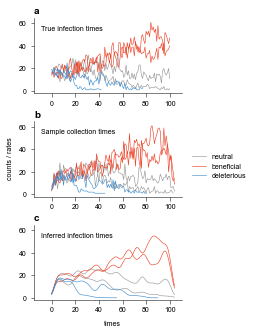

In [3]:
# plot dataframes

file_count = 6  # indices 0 to 5

dataframes = {}
for i in range(file_count):
    stoc_file = os.path.join(STOC, f"dataframe_[{i}].csv")
    read_file = os.path.join(READ, f"dataframe_[{i}].csv")
    write_file = os.path.join(WRITE, f"dataframe_[{i}]_rates.csv")
    dataframes[f"df_stoc_{i}"] = pd.read_csv(stoc_file)
    dataframes[f"df_read_{i}"] = pd.read_csv(read_file)
    dataframes[f"df_write_{i}"] = pd.read_csv(write_file)

df_concat_stoc = pd.concat([dataframes[f"df_stoc_{i}"] for i in range(file_count)], ignore_index=True)    
df_concat_read = pd.concat([dataframes[f"df_read_{i}"] for i in range(file_count)], ignore_index=True)
df_concat_write = pd.concat([dataframes[f"df_write_{i}"] for i in range(file_count)], ignore_index=True)

# plot parameters, global variables, colors

mpl.rc('font',family='Arial')

# helper sizing function
def cm2inch(x): 
    return float(x)/2.54

# global values paper size
SINGLE_COLUMN = cm2inch(8.8)
DOUBLE_COLUMN = cm2inch(18.0)

FONTFAMILY    = 'Arial'
SIZESUBLABEL  = 8
SIZE_LABEL     = 7
SIZE_TICK      = 7
SMALLSIZEDOT  = 6.
SIZELINE      = 0.6
AXES_FONTSIZE = 7
AXWIDTH       = 0.4

#custom_labels = [f'allele {i+1}' for i in range(file_count)] + [f'allele {i+1}' for i in range(file_count)]
custom_labels = [('neutral'), ('neutral'), ('beneficial'), ('beneficial'), ('deleterious'), ('deleterious')]

colors = [(0.267004, 0.004874, 0.329415, 1.0), 
          (0.253935, 0.265254, 0.529983, 1.0), 
          (0.163625, 0.471133, 0.558148, 1.0), 
          (0.134692, 0.658636, 0.517649, 1.0), 
          (0.477504, 0.821444, 0.318195, 1.0), 
          (0.993248, 0.906157, 0.143936, 1.0)]

color_hus = [(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
             (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
(0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
             (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
(0.23299120924703914, 0.639586552066035, 0.9260706093977744),
            (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

LCOLOR     = '#969696'
C_BEN      = '#EB4025' #'#F16913'
C_BEN_LT   = '#F08F78' #'#fdd0a2'
C_NEU      =  LCOLOR   #'#E8E8E8' # LCOLOR
C_NEU_LT   = '#E8E8E8' #'#F0F0F0' #'#d9d9d9'
C_DEL      = '#3E8DCF' #'#604A7B'
C_DEL_LT   = '#78B4E7' #'#dadaeb'

color_mpl = [C_NEU, C_NEU, C_BEN, C_BEN, C_DEL, C_DEL]

# plotting

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(SINGLE_COLUMN,(SINGLE_COLUMN*1.3)))

for i in range(file_count):
    zr = dataframes[f"df_stoc_{i}"]['times']
    ar = dataframes[f"df_stoc_{i}"]['counts']                                                         
    ax1.plot(zr, ar, color=color_mpl[i], linewidth=0.6)  
    ax1.set_xlim(-15,110)
    ax1.set_ylim(-2,65)

for i in range(file_count):
    df = dataframes[f"df_read_{i}"]
    df = df.drop(df[(df.times < -2) | (df.times > 102)].index)
    xr = df['times']
    yr = df['counts']

    # shift to start at 0 by adding 2 (ad hoc procedure)
    if i % 2 == 0:
        ax2.plot(xr + 2, yr, label=custom_labels[i], color=color_mpl[i], linewidth=0.6)
    else:
        ax2.plot(xr + 2, yr, color=color_mpl[i], linewidth=0.6)

    ax2.set_xlim(-15,110)
    ax2.set_ylim(-2,65)
for i in range(file_count):
    df = dataframes[f"df_write_{i}"]
    df = df.drop(df[(df.times < -9) | (df.times > 95)].index)
    xw = df['times']
    yw = df['rates']
    
    # shift to start at 0 by adding 9 (ad hoc procedure)
    ax3.plot(xw + 9, yw, color=color_mpl[i], linewidth=0.6)
    
    ax3.set_xlim(-15,110)
    ax3.set_ylim(-2,65)

#ax1.set_xlabel('Times')
#ax1.set_ylabel('Counts / Rates')
#ax1.set_title('True infection times:\nAlleles in a stochastic branching process', loc='left', font='Arial', fontsize=SIZE_LABEL-1, y=0.75, x=.05)
#ax2.set_title('Sample collection times:\nTransformed to model noisy sampling', loc='left', font='Arial', fontsize=SIZE_LABEL-1, y=0.75, x=.05)
#ax3.set_title('Inferred infection times:\nBack-projection smoothing applied', loc='left', font='Arial', fontsize=SIZE_LABEL-1, y=0.75, x=.05)

ax1.set_title('True infection times', loc='left', font='Arial', fontsize=SIZE_LABEL, y=0.75, x=.05)
ax2.set_title('Sample collection times', loc='left', font='Arial', fontsize=SIZE_LABEL, y=0.75, x=.05)
ax3.set_title('Inferred infection times', loc='left', font='Arial', fontsize=SIZE_LABEL, y=0.75, x=.05)
ax2.legend(bbox_to_anchor=(1.03, .65), loc='best', fontsize=SIZE_LABEL, frameon=False)

# extra paper parameters

ax1.set_xlabel('a', font='Arial', fontweight='bold', size=SIZE_LABEL+3, loc='left')
ax2.set_xlabel('b', font='Arial', fontweight='bold', size=SIZE_LABEL+3, loc='left')
ax3.set_xlabel('c', font='Arial', fontweight='bold', size=SIZE_LABEL+3, loc='left')
ax1.xaxis.set_label_position('top')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

SPINE_LW = 0.5

ax1.tick_params(axis='x', labelsize=SIZE_TICK, width=SPINE_LW)
ax1.tick_params(axis='y', labelsize=SIZE_TICK, width=SPINE_LW)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontname('Arial')
    
ax2.tick_params(axis='x', labelsize=SIZE_TICK, width=SPINE_LW)
ax2.tick_params(axis='y', labelsize=SIZE_TICK, width=SPINE_LW)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontname('Arial')
    
ax3.tick_params(axis='x', labelsize=SIZE_TICK, width=SPINE_LW)
ax3.tick_params(axis='y', labelsize=SIZE_TICK, width=SPINE_LW)
for label in ax3.get_xticklabels() + ax3.get_yticklabels():
    label.set_fontname('Arial')

for line in ['top', 'right']:
    ax1.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax1.spines[line].set_linewidth(SPINE_LW)
for line in ['top', 'right']:
    ax2.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax2.spines[line].set_linewidth(SPINE_LW)
for line in ['top', 'right']:
    ax3.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax3.spines[line].set_linewidth(SPINE_LW)

#fig.suptitle('A Typical Evolutionary Simulation, Comparison', font='Arial', fontsize=SIZE_LABEL, y=1.005, x=0.465)
fig.supylabel('counts / rates', font='Arial', fontsize=SIZE_LABEL, y=0.52, ha='center')#, x=0.055, y=0.53)
fig.supxlabel('times', font='Arial', fontsize=SIZE_LABEL, x=0.43, va='center')#, y=0.045, x=0.465)

plt.tight_layout(pad=0.4)

#plt.savefig('/Users/liz/Documents/GitHub/paper-epi-backprojection/figures/stoc_sh_bp.pdf', dpi=300, edgecolor=None, transparent=True)#, bbox_inches='tight')
plt.show()

In [4]:
os.chdir(NPZ_DIR)

# inference data

inf_stoc = np.load('inf-samp100-T100-sim10000-stochastic.npz')
inf_shuff = np.load('inf_shuffled_trimmed.npz')
inf_bp = np.load('inf_backprojected_trimmed.npz')

init_sel = [0,0,0.03,0.03,-0.03,-0.03]

# convert numpy arrays to pandas dfs

arr = inf_stoc['selection_ind']
arr_shuff = inf_shuff['selection_ind']
arr_bp = inf_bp['selection_ind']

inf_stoc_df = pd.DataFrame(arr, columns=[f'Column_{i}' for i in range(arr.shape[1])])
inf_shuff_df = pd.DataFrame(arr_shuff, columns=[f'Column_{i}' for i in range(arr_shuff.shape[1])])
inf_bp_df = pd.DataFrame(arr_bp, columns=[f'Column_{i}' for i in range(arr_bp.shape[1])])

inf_stoc_df['Type'] = 'True infection times'
inf_shuff_df['Type'] = 'Sample collection times'
inf_bp_df['Type'] = 'Inferred infection times'

# combine all data
combined = pd.concat([inf_stoc_df, inf_shuff_df, inf_bp_df])

# melt dfs to long format
melted_data = pd.melt(combined, id_vars='Type', var_name='allele_site', value_name='selection_coefficient')

df_stoc = pd.DataFrame(arr, columns=[f'Allele_{i}' for i in range(arr.shape[1])])
df_shuff = pd.DataFrame(arr_shuff, columns=[f'Allele_{i}' for i in range(arr_shuff.shape[1])])
df_bp = pd.DataFrame(arr_bp, columns=[f'Allele_{i}' for i in range(arr_bp.shape[1])])


# RMSE calculation

actual_sel = [0, 0, 0.03, 0.03, -0.03, -0.03]  

stl = []
shl = []
bpl = []

for i in range(len(df_stoc)):
    row_stoc = df_stoc.loc[i, :].values.flatten().tolist()
    mse_stoc = sklearn.metrics.mean_squared_error(actual_sel, row_stoc)
    rmse_stoc = math.sqrt(mse_stoc)
    stl.append(rmse_stoc)
    
for i in range(len(df_shuff)):
    row_shuff = df_shuff.loc[i, :].values.flatten().tolist()
    mse_shuff = sklearn.metrics.mean_squared_error(actual_sel, row_shuff)
    rmse_shuff = math.sqrt(mse_shuff)
    shl.append(rmse_shuff)

for i in range(len(df_bp)):
    row_bp = df_bp.loc[i, :].values.flatten().tolist()
    mse_bp = sklearn.metrics.mean_squared_error(actual_sel, row_bp)
    rmse_bp = math.sqrt(mse_bp)
    bpl.append(rmse_bp)

av_bp = sum(bpl)/len(bpl)
av_stoc = sum(stl)/len(stl)
av_shuf = sum(shl)/len(shl)

# after right and left truncation (trimming):

#Average RMS error across stochastic simulations: 0.011162653743445626
#Average RMS error across shuffled simulations: 0.012585057316749923
#Average RMS error across back-projected simulations: 0.011444972680955484

print(f'Average RMS error across stochastic simulations: {av_stoc}')
print(f'Average RMS error across shuffled simulations: {av_shuf}')
print(f'Average RMS error across back-projected simulations: {av_bp}')


# AUROC calculation

bp_auc = []
st_auc = []
sh_auc = []

for i in range(len(df_bp)):
    
    actual = [0, 0, 0.03, 0.03, -0.03, -0.03]
    inferred = df_bp.loc[i, :].values.flatten().tolist()
    threshold = 0
    binary_actual = [1 if val > threshold else 0 for val in actual]

    auc_score = roc_auc_score(binary_actual, inferred)
    bp_auc.append(auc_score)
    
for i in range(len(df_stoc)):
    
    actual = [0, 0, 0.03, 0.03, -0.03, -0.03]
    inferred = df_stoc.loc[i, :].values.flatten().tolist()
    threshold = 0
    binary_actual = [1 if val > threshold else 0 for val in actual]

    auc_score = roc_auc_score(binary_actual, inferred)
    st_auc.append(auc_score)


for i in range(len(df_shuff)):
    
    actual = [0, 0, 0.03, 0.03, -0.03, -0.03]
    inferred = df_shuff.loc[i, :].values.flatten().tolist()
    threshold = 0
    binary_actual = [1 if val > threshold else 0 for val in actual]

    auc_score = roc_auc_score(binary_actual, inferred)
    sh_auc.append(auc_score)
    
# with truncation (trimmed):

#Average AUROC score, stochastic:  0.9955125
#Average AUROC score, shuffled:  0.9910125
#Average AUROC score, back projection:  0.9958375
    
print("Average AUROC score, stochastic: ", sum(st_auc)/len(st_auc))
print("Average AUROC score, shuffled: ",sum(sh_auc)/len(sh_auc))
print("Average AUROC score, back projection: ",sum(bp_auc)/len(bp_auc))

Average RMS error across stochastic simulations: 0.011162653743445626
Average RMS error across shuffled simulations: 0.012585057316749923
Average RMS error across back-projected simulations: 0.011444972680955484
Average AUROC score, stochastic:  0.9955125
Average AUROC score, shuffled:  0.9910125
Average AUROC score, back projection:  0.9958375


/Users/liz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

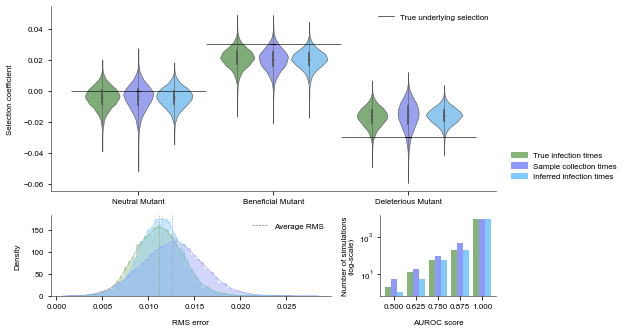

In [5]:
mpl.rc('font',family='Arial')

# violin plots of inferred selection coefficients
def violins(ax, melted_data):

    # custom colors
    palette_cust = ["xkcd:faded green", "xkcd:periwinkle blue", "xkcd:sky"]
    customPalette = sns.set_palette(sns.color_palette(palette_cust))

    # filter data
    filtered_even = melted_data[melted_data['allele_site'].isin(['Column_0', 'Column_2', 'Column_4'])]
    filtered_odd = melted_data[melted_data['allele_site'].isin(['Column_1', 'Column_3', 'Column_5'])]

    init_sel_sm = [0, 0.03, -0.03]

    # violins
    sns.violinplot(x='allele_site', y='selection_coefficient', hue='Type',
                   saturation=0.8, palette=customPalette, data=filtered_even, linewidth=0.6,
                   inner_kws=dict(box_width=15, whis_width=7, color="0.7"),
                   ax=ax)

    x_positions_even = {'Column_0': 0, 'Column_2': 1, 'Column_4': 2}

    for idx, value in enumerate(init_sel_sm):
        col_name = f'Column_{idx * 2}'
        if col_name in x_positions_even:
            x_pos = x_positions_even[col_name]
            ax.errorbar(x_pos, value, xerr=0.5, fmt='_', linewidth=0.6, color='black', capsize=0)

    ax.set_xlabel(None)
    #ax.set_xlabel('Mutation type', fontsize=8, labelpad=10)
    ax.set_ylabel('Selection coefficient', fontsize=8, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    handles = [plt.Line2D([0], [0], color='k', linewidth=0.6, label='True underlying selection')]
    ax.legend(handles=handles, fontsize=8, frameon=False)

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Neutral Mutant', 'Beneficial Mutant', 'Deleterious Mutant'])

    return ax

def rms_plot(ax, stl, shl, bpl, av_stoc, av_shuf, av_bp):
    
    # custom colors
    
    color_original = "xkcd:sage green"
    color_new = "xkcd:periwinkle blue"
    color_bp = "xkcd:sky"

    # average RMS
    ax.axvline(av_stoc, color=color_original, linestyle='dashed', linewidth=0.6, label='Avg RMS, True Infections')
    ax.axvline(av_shuf, color=color_new, linestyle='dashed',linewidth=0.6, label='Avg RMS, True Transmissions')
    ax.axvline(av_bp, color=color_bp, linestyle='dashed',linewidth=0.6, label='Avg RMS, Inferred Infections')

    # distributions
    sns.distplot(stl, color=color_original, label = 'True Infections', kde_kws=dict(linewidth=0.6), ax=ax)
    sns.distplot(shl, color=color_new, label = 'True Transmissions',kde_kws=dict(linewidth=0.6), ax=ax)
    sns.distplot(bpl, color=color_bp, label = 'Inferred Infections',kde_kws=dict(linewidth=0.6),ax=ax)
    #sns.kdeplot(stl, color='r', label='True Infections', ax=ax, alpha=0.6)
    #sns.kdeplot(shl, color='g', label='True Transmissions', ax=ax, alpha=0.6)
    #sns.kdeplot(bpl, color='b', label='Inferred Infections', ax=ax, alpha=0.6)
    
    ax.set_xlabel('RMS error', fontsize=8, labelpad=10)
    ax.set_ylabel('Density', fontsize=8, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    handles = [
        plt.Line2D([0], [0], color='k', alpha=0.6, linewidth=0.6, linestyle='dashed', label='Average RMS')
    ]
    ax.legend(loc='upper right', fontsize=8, handles=handles, frameon=False)
    
    return ax

def auroc_plot(ax, y_st, y_sh, y_bp):
    
    # custom colors
    
    color_original = "xkcd:sage green"
    color_new = "xkcd:periwinkle blue"
    color_bp = "xkcd:sky"
    
    # custom histogram bins, log score
    
    result = np.stack((y_st, y_sh, y_bp), axis=1)
    bins = [0.4375, 0.5625, 0.6875, 0.8125, 0.9375, 1.0625]
    ax.set_yscale('log')
    ax.set_xlabel('AUROC score', fontsize=8, labelpad=10)
    ax.set_ylabel('Number of simulations\n(log-scale)', fontsize=8)
    ax.set_xticks([0.5, 0.625, 0.75, 0.875, 1])
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)
    
    ax.hist(result, histtype='bar', bins=bins, color=[color_original, color_new, color_bp], 
            label=("True infection times", "Sample collection times", "Inferred infection times"))

    return ax

# global color

color_original = "xkcd:sage green"
color_new = "xkcd:periwinkle blue"
color_bp = "xkcd:sky"

# gridspec parameters

fig = plt.figure(figsize = (DOUBLE_COLUMN, DOUBLE_COLUMN/1.5))
gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, :-1])
ax3 = fig.add_subplot(gs[-1, -1])

ax1 = violins(ax1, melted_data)
ax2 = rms_plot(ax2, stl, shl, bpl, av_stoc, av_shuf, av_bp)
ax3 = auroc_plot(ax3, st_auc, sh_auc, bp_auc)

handles = [
    mpatches.Patch(facecolor=color_original, edgecolor=color_original, label = 'True infection times'),
    mpatches.Patch(facecolor=color_new, edgecolor=color_new, label= 'Sample collection times'),
    mpatches.Patch(facecolor=color_bp, edgecolor=color_bp, label = 'Inferred infection times')
]

for line in ['top', 'right']:
    ax1.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax1.spines[line].set_linewidth(SPINE_LW)
for line in ['top', 'right']:
    ax2.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax2.spines[line].set_linewidth(SPINE_LW)
for line in ['top', 'right']:
    ax3.spines[line].set_visible(False)
for line in ['left', 'bottom']:
    ax3.spines[line].set_linewidth(SPINE_LW)

fig.legend(handles=handles, fontsize=8, loc='center right', bbox_to_anchor=(1.23, 0.5), frameon=False)

fig.tight_layout()
plt.show()

#plt.savefig('/Users/liz/Documents/GitHub/paper-epi-backprojection/figures/grid_sim.pdf', bbox_inches='tight', dpi = 600)